# Simulate stochastic choices

author: steeve laquitaine

This tutorial simulates the stochastic choices made by a standard Bayesian model.

## Setup

In [2]:
# go to the project's root path
import os
os.chdir("..")

In [16]:
# import dependencies
from bsfit.nodes.models.bayes import StandardBayes
from bsfit.nodes.dataEng import (
    simulate_task_conditions,
)
import pandas as pd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Set the parameters

In [4]:
# set the parameters
SUBJECT = "sub01"
PRIOR_SHAPE = "vonMisesPrior"
PRIOR_MODE = 225
OBJ_FUN = "maxLLH"
READOUT = "map"
PRIOR_NOISE = [80, 40]      # e.g., prior's std
STIM_NOISE = [0.33, 0.66, 1.0]
SIM_P = {
    "k_llh": [2.7, 10.7, 33],
    "k_prior": [2.7, 33],
    "k_card": [1],
    "prior_tail": [0],
    "p_rand": [0],
    "k_m": [2000],
}
GRANULARITY = "trial"
CENTERING = True

## Simulate task conditions (design matrix)

In [5]:
# simulate task conditions
conditions = simulate_task_conditions(
    stim_noise=STIM_NOISE,
    prior_mode=PRIOR_MODE,
    prior_noise=PRIOR_NOISE,
    prior_shape=PRIOR_SHAPE,
)

The task conditions are shown below.

In [6]:
conditions

,stim_mean,stim_std,prior_mode,prior_std,prior_shape
0,5,0.33,225,80,vonMisesPrior
1,10,0.33,225,80,vonMisesPrior
2,15,0.33,225,80,vonMisesPrior
3,20,0.33,225,80,vonMisesPrior
4,25,0.33,225,80,vonMisesPrior
...,...,...,...,...,...
67,340,1.00,225,40,vonMisesPrior
68,345,1.00,225,40,vonMisesPrior
69,350,1.00,225,40,vonMisesPrior
70,355,1.00,225,40,vonMisesPrior


## Simulate stochastic choices

In [7]:
# instantiate the model
model = StandardBayes(
    prior_shape=PRIOR_SHAPE, 
    prior_mode=PRIOR_MODE, 
    readout=READOUT
    )

# simulate trial predictions
output = model.simulate(
    dataset=conditions,
    sim_p=SIM_P,
    granularity=GRANULARITY,
    centering=CENTERING,
)

Running simulation ...

-logl:nan, aic:nan, kl:[ 2.7 10.7 33. ], kp:[ 2.7 33. ], kc:[1.], pt:0.00, pr:0.00, km:2000.00


The simulated dataset is shown below.

In [8]:
output["dataset"]

,stim_mean,stim_std,prior_mode,prior_std,prior_shape,estimate
0,5,0.33,225,80.0,vonMisesPrior,1
1,5,0.33,225,80.0,vonMisesPrior,2
2,5,0.33,225,80.0,vonMisesPrior,340
3,5,0.33,225,80.0,vonMisesPrior,357
4,5,0.33,225,80.0,vonMisesPrior,357
...,...,...,...,...,...,...
2155,360,1.00,225,40.0,vonMisesPrior,220
2156,360,1.00,225,40.0,vonMisesPrior,228
2157,360,1.00,225,40.0,vonMisesPrior,229
2158,360,1.00,225,40.0,vonMisesPrior,223


### Calculate estimate choice statistics

Running simulation ...

Calculating predictions ...

-logl:37550.72, aic:75119.44, kl:[ 2.7 10.7 33. ], kp:[ 2.7 33. ], kc:[1.], pt:0.00, pr:0.00, km:2000.00


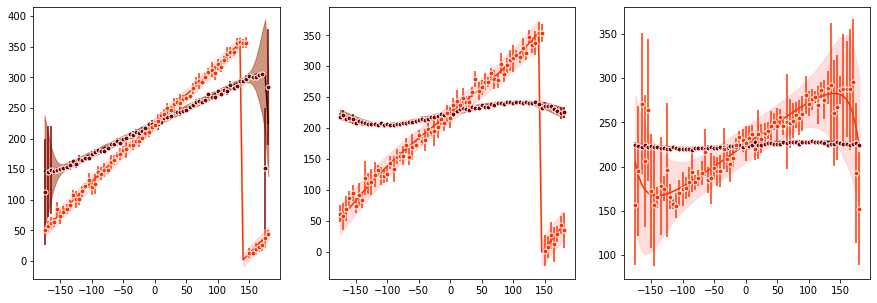

In [10]:
# simulate predictions
from matplotlib import pyplot as plt
plt.figure(figsize=(15,5))

model = model.simulate(
    dataset=output["dataset"],
    sim_p=SIM_P,
    granularity="mean",
    centering=CENTERING,
)

An preview of the unique 431 combinations of task conditions (prior noise, stimulus noise, stimulus feature) are shown below:

In [27]:
pd.DataFrame(output["conditions"]).head()

,0,1,2
0,80.0,0.33,5.0
1,80.0,0.33,10.0
2,80.0,0.33,15.0
3,80.0,0.33,20.0
4,80.0,0.33,25.0


**Model's estimate generative probability density**: the probability that the model generates each estimate is shown below, 
with the estimates ranging from 0 to 359 in the rows and each unique 431 combinations (prior noise, stimulus noise, stimulus feature) in the columns:

In [19]:
pd.DataFrame(output["PestimateGivenModel"]).head()

,0,1,2,3,4,5,6,7,8,9,...,422,423,424,425,426,427,428,429,430,431
0,0.039645,0.033255,0.021730,0.011097,0.004451,0.001412,0.000358,0.000073,0.000012,0.000002,...,9.999889e-320,2.852656e-18,9.999889e-320,9.999889e-320,9.999889e-320,2.312965e-19,2.852656e-18,9.999889e-320,4.240435e-19,4.625929e-19
1,0.039845,0.035143,0.024135,0.012943,0.005446,0.001810,0.000479,0.000102,0.000018,0.000003,...,2.235866e-18,2.621360e-18,9.999889e-320,9.999889e-320,1.195032e-18,3.854941e-20,9.999889e-320,9.999889e-320,1.850372e-18,7.324388e-19
2,0.039645,0.036767,0.026542,0.014951,0.006600,0.002298,0.000636,0.000141,0.000025,0.000004,...,9.999889e-320,1.888921e-18,9.999889e-320,8.480870e-19,1.272131e-18,2.052756e-18,9.999889e-320,9.999889e-320,9.999889e-320,3.180326e-18
3,0.039052,0.038083,0.028900,0.017102,0.007924,0.002891,0.000837,0.000194,0.000036,0.000006,...,8.866364e-19,1.002285e-17,2.852656e-18,9.999889e-320,9.999889e-320,1.927471e-19,9.999889e-320,4.471732e-18,9.999889e-320,9.999889e-320
4,0.038083,0.039052,0.031156,0.019373,0.009422,0.003604,0.001092,0.000265,0.000052,0.000008,...,9.406056e-18,9.999889e-320,9.999889e-320,1.696174e-18,9.999889e-320,4.625929e-18,9.999889e-320,7.709882e-19,9.999889e-320,9.999889e-320


Here is a list of the attributes generated by the simulation:

In [33]:
list(output.keys())

['PestimateGivenModel',
 'map',
 'conditions',
 'prediction_mean',
 'prediction_std',
 'dataset']

Tutorial complete !